# Kaggle Learn-and-compete `Poker Rule Induction`

## Data Description

You are provided with 25,010 poker hands in train.csv and 1,000,000 in test.csv. Each hand consists of five cards with a given suit and rank, drawn from a standard deck of 52. Suits and ranks are represented as ordinal categories:

```
S1 “Suit of card #1”
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}
C1 “Rank of card #1”
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

...

S5 “Suit of card #5”
C5 “Rank of card #5”
```

Each row in the training set has the accompanying class label for the poker hand it comprises. The hands are omitted from the test set and must be predicted by participants. Hands are classified into the following ordinal categories:


```
0: Nothing in hand; not a recognized poker hand 
1: One pair; one pair of equal ranks within five cards
2: Two pairs; two pairs of equal ranks within five cards
3: Three of a kind; three equal ranks within five cards
4: Straight; five cards, sequentially ranked with no gaps
5: Flush; five cards with the same suit
6: Full house; pair + different rank three of a kind
7: Four of a kind; four equal ranks within five cards
8: Straight flush; straight + flush
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush
```
Note that the Straight flush and Royal flush hands are not representative of
the true domain because they have been over-sampled. The straight flush
is 14.43 times more likely to occur in the training set, while the royal flush is 129.82 times more likely.

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

#### Read data

In [2]:
pd.read_csv('test.csv', delimiter=',')

,id,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,10,2,2,3,3,3,8,1,1
1,2,2,13,3,5,3,7,4,6,1,4
2,3,1,3,1,11,2,8,2,1,2,4
3,4,1,6,3,3,4,7,1,8,3,11
4,5,2,10,3,4,1,6,2,12,2,6
5,6,1,4,3,10,2,11,2,6,1,7
6,7,1,10,3,8,1,4,3,11,3,9
7,8,2,11,3,8,1,1,1,11,2,3
8,9,3,4,1,1,1,3,3,5,3,6
9,10,3,12,2,1,1,3,1,2,3,10


In [3]:
train_dataset = pd.read_csv('train.csv', delimiter=',')

In [4]:
data = train_dataset[['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5']]
labels = train_dataset[['hand']]

In [5]:
labels_vect = tf.keras.utils.to_categorical(labels)

In [9]:
def data_hotencode(data, columns, encoder, mode='transform'):
    encoded = None
    if (mode == 'fit'):
        encoded = encoder.fit_transform(data[columns])
    elif (mode == 'transform'):
        encoded = encoder.transform(data[columns])
        print(encoded.toarray)
    return pd.concat([data.drop(columns, axis=1), pd.DataFrame(encoded.toarray())], axis=1)

def hand_hotencode(hand, columns, encoder):
    df = pd.DataFrame(data=[hand], columns=['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5'])
    return data_hotencode(df, columns, encoder, 'transform')

In [10]:
encoder = OneHotEncoder()
columns_to_hotencode = ['S1', 'S2', 'S3', 'S4', 'S5']
data_encoded = data_hotencode(data, columns_to_hotencode, encoder, 'fit')
print(data_encoded.shape)

hand_hotencode([1,2,1,3,1,4,1,5,1,6], columns_to_hotencode, encoder)

(25010, 25)
<bound method _cs_matrix.toarray of <1x20 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>>


,C1,C2,C3,C4,C5,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
0,2,3,4,5,6,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Encode cards

In [11]:
def card_encode(s, c):
    cards=["A","2","3","4","5","6","7","8","9","10","J","Q","K"]
    suits="♥♦♣♠"
    return cards[c - 1] + suits[s - 1]

def hand_encode(hand):
    return ', '.join(map(lambda x: card_encode(hand[x*2], hand[x*2+1]),range(5)))

print(hand_encode([4,9,2,1,2,2,4,7,2,8]))
print(hand_encode([2,9,2,4,3,6,1,9,4,9]))

9♠, A♦, 2♦, 7♠, 8♦
9♦, 4♦, 6♣, 9♥, 9♠


### Solutions

1. Neural network
2. Random forest

Ousiders:
 - Genetic algorithm
 - Decision tree

### Neural Network

In [13]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(25,)))
model.add(keras.layers.Dense(64, activation='relu'))
# Add another:
model.add(keras.layers.Dense(32, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(np.array(data_encoded), np.array(labels_vect), epochs=1000, batch_size=32)

Epoch 1/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 1.1262 - acc: 0.4720

Epoch 2/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.9940 - acc: 0.5125

Epoch 3/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.9843 - acc: 0.5266

Epoch 4/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.9776 - acc: 0.5315

Epoch 5/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.9724 - acc: 0.5360

Epoch 6/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.9674 - acc: 0.5394

Epoch 7/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step -

25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.8891 - acc: 0.6022

Epoch 56/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.8880 - acc: 0.6030

Epoch 57/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.8867 - acc: 0.6022

Epoch 58/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 42us/step - loss: 0.8855 - acc: 0.604025010 [============>.................] - ETA: 0s - loss: 0.8782 

Epoch 59/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 39us/step - loss: 0.8843 - acc: 0.6057

Epoch 60/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.8827 - acc: 0.6064: 0s - loss: 0.8802 - acc: 0

Epoch 61/1000
25010/25010 [=======

25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.8248 - acc: 0.642725010 [======================>.......] - ETA: 0s - loss: 0.8226 - acc: 0.6

Epoch 105/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.8239 - acc: 0.6443

Epoch 106/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.8206 - acc: 0.6472

Epoch 107/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.8198 - acc: 0.6440: 0s - loss: 0.8189 - acc: 0.6424384/25010 [============================>.] - ETA: 0s - loss: 0.8195 - acc: 0.644

Epoch 108/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.8188 - acc: 0.6470

Epoch 109/1000
25010/25010 [==============================]25010/25010 [===========

25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.7632 - acc: 0.677325010 [==============>...............] - ETA: 0s - loss: 0.7628 - acc: 0.6717344/25010 [===================>..........] - ETA: 0s - loss: 0.7646 - acc: 

Epoch 150/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.7622 - acc: 0.6760: 0s - loss: 0.7694 - acc:

Epoch 151/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.7600 - acc: 0.6772

Epoch 152/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.7592 - acc: 0.6760

Epoch 153/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.7581 - acc: 0.6767

Epoch 154/1000
25010/25010 [==============================]25010/25010 [====================

25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.7100 - acc: 0.7016: 0s - loss: 0.7082 - acc: 0

Epoch 196/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.7090 - acc: 0.702625010 [======================>.......] - ETA: 0s - loss: 0.7056 - acc: 0.

Epoch 197/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.7084 - acc: 0.7025

Epoch 198/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.7071 - acc: 0.7060

Epoch 199/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.7045 - acc: 0.7047

Epoch 200/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.7044 - acc: 0.704825010 [========>......

25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.6556 - acc: 0.7334

Epoch 243/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.6559 - acc: 0.7304

Epoch 244/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.6552 - acc: 0.7309: 0s - loss: 0.6610 - acc: 0.713824/25010 [===============>..............] - ETA: 0s - loss: 0.6648 - acc: 0.7216736/25010 [===================>..........] - ETA: 0s - loss: 0.6600 - acc: 

Epoch 245/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.6513 - acc: 0.7356

Epoch 246/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.6524 - acc: 0.7338

Epoch 247/1000
25010/25010 [==============================]25010/25010 [==========

25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.6001 - acc: 0.7610

Epoch 292/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.5982 - acc: 0.761325010 [=================>............] - ETA: 0s - loss: 0.5940 - acc:

Epoch 293/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.5963 - acc: 0.7628

Epoch 294/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.5972 - acc: 0.7617

Epoch 295/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.5961 - acc: 0.7602

Epoch 296/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.5955 - acc: 0.7659

Epoch 297/1000
25010/25010 [=======================

25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.5469 - acc: 0.7864

Epoch 341/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.5419 - acc: 0.7906

Epoch 342/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.5422 - acc: 0.7886

Epoch 343/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.5420 - acc: 0.7877

Epoch 344/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.5418 - acc: 0.7893

Epoch 345/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.5415 - acc: 0.7875

Epoch 346/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.4855 - acc: 0.8182

Epoch 392/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.4828 - acc: 0.818225010 [=========>....................] - ETA: 0s - loss: 0.4657 - 

Epoch 393/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.4824 - acc: 0.8193

Epoch 394/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.4809 - acc: 0.8202

Epoch 395/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.4815 - acc: 0.8198: 0s - loss: 0.4786 - acc: 0

Epoch 396/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.4792 - acc: 0.8206

Epoch 397/1000
25010/25010 

25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.4308 - acc: 0.8441

Epoch 442/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.4264 - acc: 0.8457

Epoch 443/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.4282 - acc: 0.8438

Epoch 444/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.4275 - acc: 0.8455

Epoch 445/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.4257 - acc: 0.8474

Epoch 446/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.4253 - acc: 0.8481

Epoch 447/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.3826 - acc: 0.8625

Epoch 493/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.3754 - acc: 0.8672

Epoch 494/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 46us/step - loss: 0.3767 - acc: 0.8692

Epoch 495/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.3734 - acc: 0.8670

Epoch 496/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.3756 - acc: 0.8689

Epoch 497/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.3745 - acc: 0.8679

Epoch 498/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.3317 - acc: 0.8844

Epoch 545/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.3316 - acc: 0.885925010 [===========>..................] - ETA: 0s - loss: 0.3285 - a

Epoch 546/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.3316 - acc: 0.8838

Epoch 547/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.3280 - acc: 0.8869

Epoch 548/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 34us/step - loss: 0.3322 - acc: 0.8844

Epoch 549/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 33us/step - loss: 0.3237 - acc: 0.8889

Epoch 550/1000
25010/25010 [==========================

25010/25010 [==============================]25010/25010 [==============================] - 1s 40us/step - loss: 0.2921 - acc: 0.9002

Epoch 598/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 44us/step - loss: 0.2918 - acc: 0.9021

Epoch 599/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.2895 - acc: 0.9009

Epoch 600/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.2888 - acc: 0.9021

Epoch 601/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.2916 - acc: 0.9004

Epoch 602/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.2886 - acc: 0.8986

Epoch 603/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 52us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 1s 49us/step - loss: 0.2550 - acc: 0.9138

Epoch 652/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 41us/step - loss: 0.2571 - acc: 0.9135

Epoch 653/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 39us/step - loss: 0.2550 - acc: 0.9123

Epoch 654/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 46us/step - loss: 0.2546 - acc: 0.9136

Epoch 655/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 59us/step - loss: 0.2547 - acc: 0.9132

Epoch 656/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 59us/step - loss: 0.2550 - acc: 0.9140

Epoch 657/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 53us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.2286 - acc: 0.923425010 [=========>....................] - ETA: 0s - loss: 0.2272 - acc: 0.9 - ETA: 0s - loss: 0.2305 - ac

Epoch 703/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 38us/step - loss: 0.2269 - acc: 0.9244

Epoch 704/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.2259 - acc: 0.9250

Epoch 705/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 39us/step - loss: 0.2274 - acc: 0.9231

Epoch 706/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.2210 - acc: 0.926925010 [=========>....................] - ETA: 0s - loss: 0.2154 

Epoch 707/1000
25010/25010 [==============================]25010/25010 [==============================

25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.2050 - acc: 0.9319

Epoch 754/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.2005 - acc: 0.9343

Epoch 755/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.2030 - acc: 0.9327

Epoch 756/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.1986 - acc: 0.9341

Epoch 757/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.2001 - acc: 0.934925010 [=================>............] - ETA: 0s - loss: 0.2010 - acc:

Epoch 758/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 36us/step - loss: 0.2009 - acc: 0.9329

Epoch 759/1000
25010/25010 [=======================

25010/25010 [==============================]25010/25010 [==============================] - 1s 48us/step - loss: 0.1851 - acc: 0.9397

Epoch 802/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 44us/step - loss: 0.1798 - acc: 0.9423

Epoch 803/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 37us/step - loss: 0.1792 - acc: 0.9421

Epoch 804/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 39us/step - loss: 0.1807 - acc: 0.9410

Epoch 805/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 41us/step - loss: 0.1772 - acc: 0.9422

Epoch 806/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 44us/step - loss: 0.1800 - acc: 0.9406

Epoch 807/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 48us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.1653 - acc: 0.9465

Epoch 854/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.1550 - acc: 0.9503

Epoch 855/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.1600 - acc: 0.9488

Epoch 856/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 35us/step - loss: 0.1565 - acc: 0.9502

Epoch 857/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 32us/step - loss: 0.1586 - acc: 0.9478

Epoch 858/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.1598 - acc: 0.9489

Epoch 859/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.1376 - acc: 0.9560

Epoch 906/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.1414 - acc: 0.9550

Epoch 907/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.1386 - acc: 0.9561

Epoch 908/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.1400 - acc: 0.9552

Epoch 909/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 30us/step - loss: 0.1412 - acc: 0.9546

Epoch 910/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.1367 - acc: 0.9571: 0s - loss: 0.1385 - acc: 0.958 9696/25010 [==========>...................] - ETA: 0s - loss: 0.1367 - a

Epoch 911/1000
2

25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.1206 - acc: 0.9639

Epoch 958/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 30us/step - loss: 0.1205 - acc: 0.9643: 0s - loss: 0.1166 - acc: 0

Epoch 959/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 31us/step - loss: 0.1205 - acc: 0.9641

Epoch 960/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 30us/step - loss: 0.1259 - acc: 0.9605

Epoch 961/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 30us/step - loss: 0.1212 - acc: 0.9636

Epoch 962/1000
25010/25010 [==============================]25010/25010 [==============================] - 1s 30us/step - loss: 0.1239 - acc: 0.9623

Epoch 963/1000
25010/25010 [==============================]25010/25010 [=====================

2♥, 3♥, 4♥, 5♥, 6♥
<bound method _cs_matrix.toarray of <1x20 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>>
[  6.49038479e-02   2.33795005e-03   1.47497405e-14   8.18317350e-22
   2.57517010e-01   7.57138878e-07   3.86610130e-32   0.00000000e+00
   6.75240457e-01   6.25190264e-12]


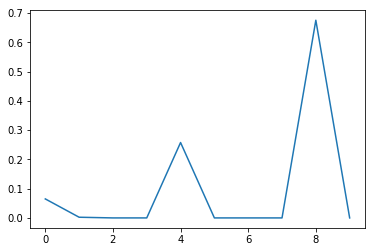

In [94]:
test_hand = [1,2,1,3,1,4,1,5,1,6]
print(hand_encode(test_hand))
prediction = model.predict(np.array(encode_hand(test_hand, columns_to_hotencode, encoder)))
print(prediction[0])
plt.plot(prediction[0])

### Random Forest